# Stars Classification

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Load Dataset

In [138]:
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Stars.csv')
df.head()

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type,Star category,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,0,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,0,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,0,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,0,Brown Dwarf,Red,M


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (K)          240 non-null    int64  
 1   Luminosity (L/Lo)        240 non-null    float64
 2   Radius (R/Ro)            240 non-null    float64
 3   Absolute magnitude (Mv)  240 non-null    float64
 4   Star type                240 non-null    int64  
 5   Star category            240 non-null    object 
 6   Star color               240 non-null    object 
 7   Spectral Class           240 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 15.1+ KB


In [140]:
df.describe()

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [141]:
df.columns

Index(['Temperature (K)', 'Luminosity (L/Lo)', 'Radius (R/Ro)',
       'Absolute magnitude (Mv)', 'Star type', 'Star category', 'Star color',
       'Spectral Class'],
      dtype='object')

In [142]:
cols = ['Temperature (K)', 'Luminosity (L/Lo)', 'Radius (R/Ro)',
       'Absolute magnitude(Mv)']

## Visualize Dataset

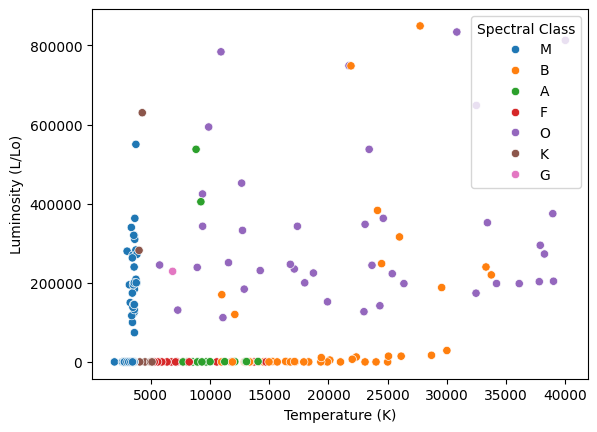

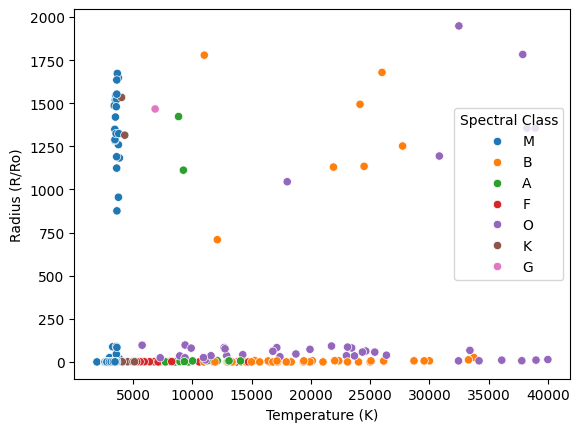

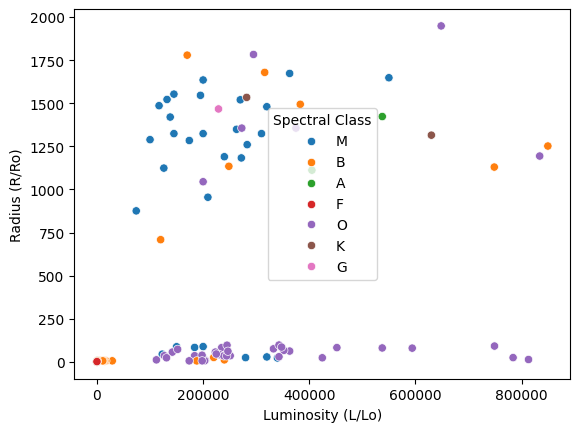

In [143]:
for i in range(len(cols)-1):
    for j in range(i+1, len(cols)-1):
      x_label = cols[i]
      y_label = cols[j]
      sns.scatterplot(x=x_label, y=y_label, data=df, hue="Spectral Class")
      plt.show()

## Spectral Class

### Data Preparation

In [144]:
df['Spectral Class'].value_counts()

,count
Spectral Class,
M,111
B,46
O,40
A,19
F,17
K,6
G,1


In [145]:
y = df['Spectral Class'].values
y

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'A', 'F', 'A', 'B', 'F',
       'A', 'F', 'F', 'F', 'O', 'B', 'B', 'B', 'F', 'A', 'F', 'F', 'F',
       'F', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'F', 'F', 'A', 'B', 'B', 'A', 'B', 'B', 'F', 'B', 'F',
       'K', 'K', 'K', 'A', 'A', 'K', 'F', 'A', 'O', 'B', 'O', 'O', 'O',
       'O', 'O', 'O', 'O', 'O', 'O', 'M', 'M', 'M', 'M', 'M', 'M', 'K',
       'M', 'G', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'A', 'B', 'F', 'A', 'B', 'B', 'A', 'A', 'B', 'B', 'B',
       'B', 'B', 'A', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O',
       'O', 'M', 'M', 'K', 'B', 'M', 'M', 'O', 'B', 'B', 'B', 'M

In [146]:
x = df[['Temperature (K)', 'Luminosity (L/Lo)', 'Radius (R/Ro)',
       'Absolute magnitude (Mv)']].values
x

array([[ 3.06800e+03,  2.40000e-03,  1.70000e-01,  1.61200e+01],
       [ 3.04200e+03,  5.00000e-04,  1.54200e-01,  1.66000e+01],
       [ 2.60000e+03,  3.00000e-04,  1.02000e-01,  1.87000e+01],
       [ 2.80000e+03,  2.00000e-04,  1.60000e-01,  1.66500e+01],
       [ 1.93900e+03,  1.38000e-04,  1.03000e-01,  2.00600e+01],
       [ 2.84000e+03,  6.50000e-04,  1.10000e-01,  1.69800e+01],
       [ 2.63700e+03,  7.30000e-04,  1.27000e-01,  1.72200e+01],
       [ 2.60000e+03,  4.00000e-04,  9.60000e-02,  1.74000e+01],
       [ 2.65000e+03,  6.90000e-04,  1.10000e-01,  1.74500e+01],
       [ 2.70000e+03,  1.80000e-04,  1.30000e-01,  1.60500e+01],
       [ 3.60000e+03,  2.90000e-03,  5.10000e-01,  1.06900e+01],
       [ 3.12900e+03,  1.22000e-02,  3.76100e-01,  1.17900e+01],
       [ 3.13400e+03,  4.00000e-04,  1.96000e-01,  1.32100e+01],
       [ 3.62800e+03,  5.50000e-03,  3.93000e-01,  1.04800e+01],
       [ 2.65000e+03,  6.00000e-04,  1.40000e-01,  1.17820e+01],
       [ 3.34000e+03,  3.

In [147]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(192, 4) (48, 4) (192,) (48,)


### Train Model

In [148]:
score = []
k_range = list(range(1, 101))
best_k = 0;
best_score = float('-inf')

for k in k_range:
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(X_train, y_train) # Train Model

  y_pred = knn_model.predict(X_test) # Predict labels for test set
  if knn_model.score(X_test, y_test) > best_score:
    best_score = knn_model.score(X_test, y_test)
    best_k = k
    print(f"Best model - k = {k}, Accuracy: {best_score}")

  score.append(knn_model.score(X_test, y_test))

Best model - k = 1, Accuracy: 0.7708333333333334


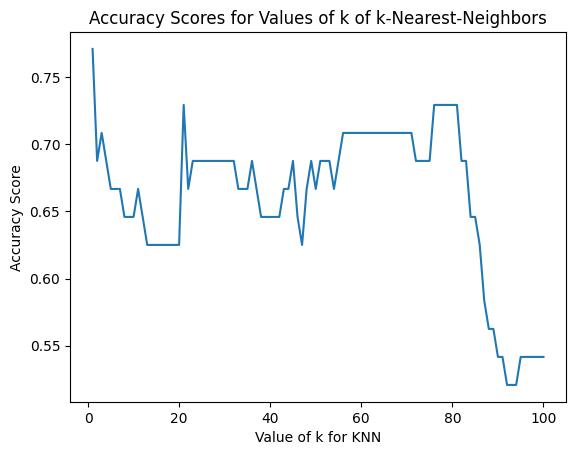

In [149]:
plt.plot(range(1,101), score)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [150]:
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [151]:
y_pred = model.predict(X_test)

In [152]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       1.00      0.50      0.67         2
           B       0.75      0.60      0.67        10
           F       0.25      0.50      0.33         2
           K       0.00      0.00      0.00         3
           M       0.91      1.00      0.95        21
           O       0.67      0.80      0.73        10

    accuracy                           0.77        48
   macro avg       0.60      0.57      0.56        48
weighted avg       0.75      0.77      0.75        48



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Star Type

### Data Preparation

In [153]:
df['Star type'].value_counts()

,count
Star type,
0,40
1,40
2,40
3,40
4,40
5,40


In [154]:
y = df['Star type'].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [155]:
x = df[['Temperature (K)', 'Luminosity (L/Lo)', 'Radius (R/Ro)',
       'Absolute magnitude (Mv)']].values
x

array([[ 3.06800e+03,  2.40000e-03,  1.70000e-01,  1.61200e+01],
       [ 3.04200e+03,  5.00000e-04,  1.54200e-01,  1.66000e+01],
       [ 2.60000e+03,  3.00000e-04,  1.02000e-01,  1.87000e+01],
       [ 2.80000e+03,  2.00000e-04,  1.60000e-01,  1.66500e+01],
       [ 1.93900e+03,  1.38000e-04,  1.03000e-01,  2.00600e+01],
       [ 2.84000e+03,  6.50000e-04,  1.10000e-01,  1.69800e+01],
       [ 2.63700e+03,  7.30000e-04,  1.27000e-01,  1.72200e+01],
       [ 2.60000e+03,  4.00000e-04,  9.60000e-02,  1.74000e+01],
       [ 2.65000e+03,  6.90000e-04,  1.10000e-01,  1.74500e+01],
       [ 2.70000e+03,  1.80000e-04,  1.30000e-01,  1.60500e+01],
       [ 3.60000e+03,  2.90000e-03,  5.10000e-01,  1.06900e+01],
       [ 3.12900e+03,  1.22000e-02,  3.76100e-01,  1.17900e+01],
       [ 3.13400e+03,  4.00000e-04,  1.96000e-01,  1.32100e+01],
       [ 3.62800e+03,  5.50000e-03,  3.93000e-01,  1.04800e+01],
       [ 2.65000e+03,  6.00000e-04,  1.40000e-01,  1.17820e+01],
       [ 3.34000e+03,  3.

In [156]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(192, 4) (48, 4) (192,) (48,)


### Train Model

In [157]:
score = []
k_range = list(range(1, 101))
best_k = 0;
best_score = float('-inf')

for k in k_range:
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(X_train, y_train) # Train Model

  y_pred = knn_model.predict(X_test) # Predict labels for test set
  if knn_model.score(X_test, y_test) > best_score:
    best_score = knn_model.score(X_test, y_test)
    best_k = k
    print(f"Best model - k = {k}, Accuracy: {best_score}")

  score.append(knn_model.score(X_test, y_test))

Best model - k = 1, Accuracy: 0.7708333333333334


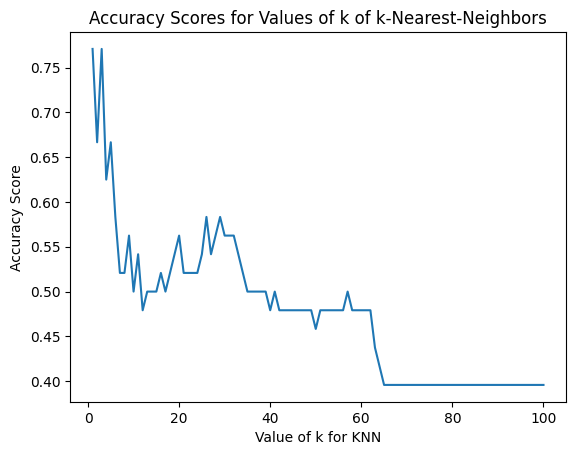

In [158]:
plt.plot(range(1,101), score)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [159]:
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [160]:
y_pred = model.predict(X_test)

In [161]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.83      0.71      0.77         7
           2       1.00      1.00      1.00         6
           3       1.00      0.88      0.93         8
           4       0.50      0.62      0.56         8
           5       0.70      0.64      0.67        11

    accuracy                           0.77        48
   macro avg       0.80      0.79      0.79        48
weighted avg       0.79      0.77      0.78        48

